In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
pip install pandas scikit-learn matplotlib seaborn kagglehub


Dataset downloaded to: /kaggle/input/lending-club
Files inside 'accepted_2007_to_2018q4.csv': ['accepted_2007_to_2018Q4.csv']
Accuracy: 0.8040564202078501
              precision    recall  f1-score   support

           0       0.49      0.09      0.15     74161
           1       0.82      0.98      0.89    305632

    accuracy                           0.80    379793
   macro avg       0.65      0.53      0.52    379793
weighted avg       0.75      0.80      0.74    379793



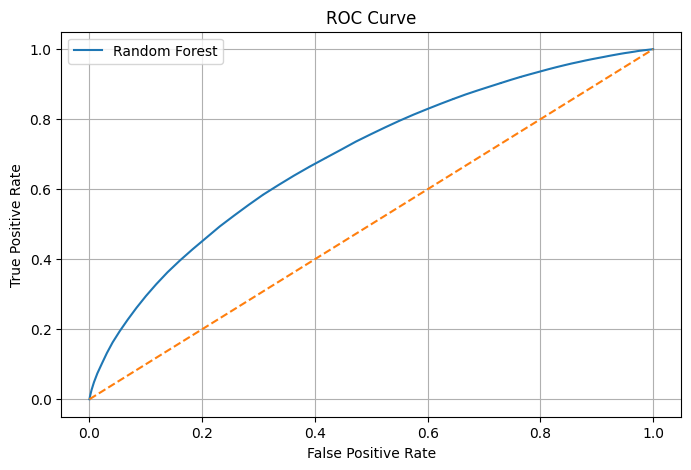

ROC AUC Score: 0.6922419522070417


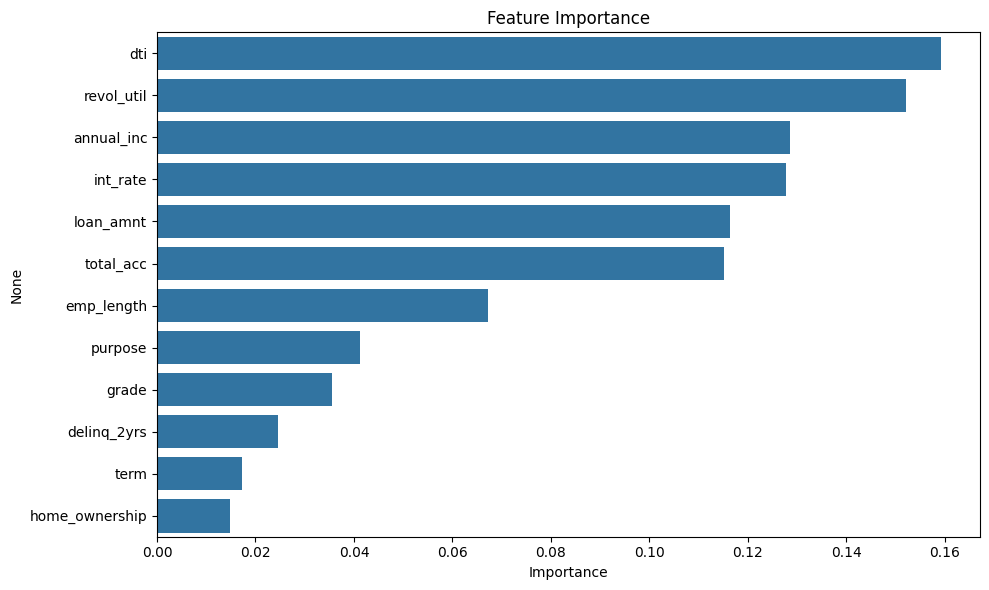

In [5]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download dataset
path = kagglehub.dataset_download("wordsforthewise/lending-club")
print("Dataset downloaded to:", path)

# Step 2: Explore folder to get correct CSV
csv_dir = os.path.join(path, "accepted_2007_to_2018q4.csv")  # This is a directory, not a CSV
files_inside = os.listdir(csv_dir)
print("Files inside 'accepted_2007_to_2018q4.csv':", files_inside)

# Step 3: Load the actual CSV file inside that directory
csv_file = [f for f in files_inside if f.endswith('.csv')][0]  # Get the first CSV inside
csv_path = os.path.join(csv_dir, csv_file)

df = pd.read_csv(csv_path, low_memory=False)

# Step 4: Select relevant columns and preprocess
columns = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
           'home_ownership', 'annual_inc', 'purpose', 'dti',
           'delinq_2yrs', 'revol_util', 'total_acc', 'loan_status']

df = df[columns].dropna()
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['target'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
df.drop('loan_status', axis=1, inplace=True)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [6]:
import joblib
joblib.dump(model, "credit_model.pkl")



['credit_model.pkl']

In [7]:
new_applicant = [[15000, 1, 13.56, 2, 5, 1, 55000, 3, 17.2, 0, 65.1, 25]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)
print("Creditworthy" if prediction[0] == 1 else "High Risk")


Creditworthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
new_applicant = [[15000, 1, 13.56, 2, 5, 1, 55000, 3, 17.2, 0, 65.1, 25]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)

print("Prediction:", "Creditworthy ✅" if prediction[0] == 1 else "High Risk ❌")

Prediction: Creditworthy ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
import joblib

# Save model and scaler
joblib.dump(model, "credit_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Later, load it like this
model = joblib.load("credit_model.pkl")
scaler = joblib.load("scaler.pkl")


In [10]:
new_applicant = [[25000, 2, 14.4, 4, 8, 1, 70000, 5, 18.3, 1, 72.3, 30]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)

print("Prediction:", "Creditworthy ✅" if prediction[0] == 1 else "High Risk ❌")


Prediction: Creditworthy ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
new_applicant = [[5000, 0, 10.1, 1, 3, 0, 30000, 2, 15.4, 0, 58.2, 22]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)

print("Prediction:", "Creditworthy ✅" if prediction[0] == 1 else "High Risk ❌")


Prediction: Creditworthy ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
new_applicant = [[2000, 0, 5.5, 1, 1, 0, 10000, 1, 9.5, 0, 40.2, 20]]
new_applicant_scaled = scaler.transform(new_applicant)
prediction = model.predict(new_applicant_scaled)

print("Prediction:", "Creditworthy ✅" if prediction[0] == 1 else "High Risk ❌")


Prediction: Creditworthy ✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
